# Data Wrangling with Pandas

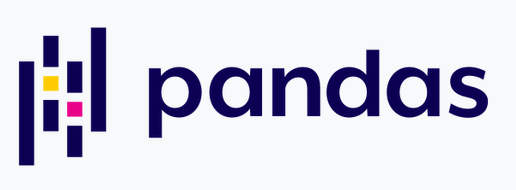

In [ ]:
import pandas as pd 

## Data Loading and Preprocessing

We will use the data from [Wikipedia](https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States#cite_note-47) of historical rankings of presidents of the United States. 

In political studies, surveys have been conducted in order to construct historical rankings of the success of the presidents of the United States. Ranking systems are usually based on surveys of academic historians and political scientists or popular opinion.

In [ ]:
presidents = pd.read_csv('./data/presidents.csv', index_col=0)
presidents.head()

In [ ]:
presidents.dtypes

As you can see, the types inferred by `pandas` can be improved.

### Change the column types of the dataframe.  

 - change the numerical columns from `int64` to `uint8` 
 - change the `Party` column type to `category`
 - change the `President` column type to `string` 

In [ ]:
# your code to change the column types of the dataframe
#
#
#


### Change the column names using the dictionary `col_names`

```python
col_names = {'Bg': 'Background',
             'PL': 'Party leadership', 'CAb': 'Communication ability',
             'RC': 'Relations with Congress', 'CAp': 'Court appointments',
             'HE': 'Handling of economy', 'L': 'Luck',
             'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
             'EAp': 'Executive appointments', 'OA': 'Overall ability',
             'Im': 'Imagination', 'DA': 'Domestic accomplishments',
             'Int': 'Integrity', 'EAb': 'Executive ability',
             'FPA': 'Foreign policy accomplishments',
             'LA': 'Leadership ability',
             'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
             'EV': "Experts' view", 'O': 'Overall'}
```

Use the [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) dataframe method to change the column names and change the spaces `" "` to underscores `"_"` in the column names at the same time, e.g. `'Relations with Congress'` should become `'Relations_with_Congress'`. 

In [ ]:
# your code to change the column names
#
#
#


## Duplicates

Use the [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) dataframe method to 

 - keep only the first president from each party
 - keep only the last president from each party 

In [ ]:
# only the first president from each party
#
#
#


In [ ]:
# only the last president from each party
#
#
#


## Sorting

The [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values) dataframe method can be used to sort a dataframe by arbitrary columns. 

 - sort the `presidents` dataframe by the political party in alphabetic order. 
 - sort by multiple columns; by `Party` in ascending and by `Overall` in descending order
 - more difficult: sort by the last name of the president (`str.split()` and the Series method [apply](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.SeriesGroupBy.apply.html?highlight=apply#pandas.core.groupby.SeriesGroupBy.apply) should be helpful)

In [ ]:
# sorted by the political party in alphabetic order
#
#
#


In [ ]:
# sorted by multiple columns: by Party in ascending and by Average_rank in descending order
#
#
#


In [ ]:
# sorted by the last name of the president
#
#
#


## Indexing and Filtering 

First, we will add two additonal columns to our `presidents` dataframe, `Average_rank` and `Quartile`. Read the code and the corresponding documentation to better understand what the code below is doing.

In [ ]:
presidents = presidents.assign(Average_rank=lambda df_:(df_.select_dtypes('uint8').sum(axis=1).rank(method='dense').astype('uint8')),
                               Quartile=lambda df_:pd.qcut(df_.Average_rank, 4, labels='1st 2nd 3rd 4th'.split())
                              )
presidents.head()

Implement the following filters:

 - presidents with average rank below 10 and from the Republican party
 - presidents with quartile 1st and from the Democratic party
 
You can use the `&` operator in usual indexing operations or use the [query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html?highlight=query) method.

In [ ]:
# presidents with average rank below 10 and from the Republican party
#
#
#


In [ ]:
# presidents with quartile 1st and from the Democratic party
#
#
#


## Missing Data 

The dataframe has an [.isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method that returns a dataframe with `True` and `False` values indicating whether values are missing. 

Are there any missing values in our `presidents` dataframe?  

In [ ]:
# your code for checking whether there are any missing values in the presidents dataframe 
#
#
#


## Reshaping by Pivoting and Grouping 

The pandas [read_html]() function usually works very well and should be considered first for html-tables, before using more complex libraries like `BeautifulSoup`. 

We will use it to read in the [NBA schedule and game results](https://www.basketball-reference.com/leagues/NBA_2022_games-november.html) from November 2022  

In [ ]:
games_nov22 = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2016_games-november.html")[0]
games_nov22

Before we can start analyzing the data the resulting dataframe needs to be cleaned first. 

1. Rename the remaining columns according to the dictionary `column_names_nba` 
2. Drop the columns `Start`, `Unnamed:6`, `Unnamed:7` and `Notes`
3. Convert the date column to the `datetime` format; use [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and `format='%a, %b %d, %Y'`
4. Check the data types of the remaining columns and convert to an appropriate data type if necessary 
5. Set the date column to be the index column (`append=True`)
6. Sort the data frame by index.

The expected output: 

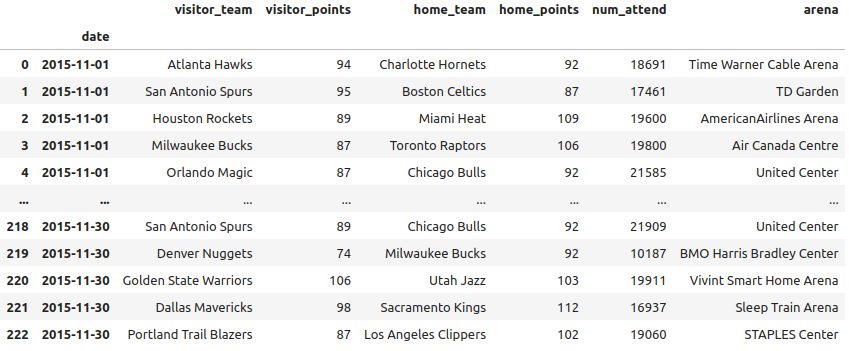

In [ ]:
# your code for dataframe cleaning
#
#
#


Pivot tables provide one of the most powerful options for data manipulations. In `pandas` there are multiple ways of leveraging this functionality. We will focus on 

 - [.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and 
 - [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

 Read the corresponding documentation and answer the following questions using the information in the dataframe above: 

1. What was the maximum number of attendents in each arena in November 2022? 
2. What was the average score of the Golden State Warriors as an away team? 
3. How many points did the Dallas Mavericks score as an away team in each arena?

In [ ]:
# your code: What was the maximum number of attendents in each arena in November 2022? 
#
#
#


In [ ]:
# your code: What was the average score of the Golden State Warriors as a visiting team? 
#
#
#


In [ ]:
# your code: How many points did the Dallas Mavericks score as an away team in each arena?
#
#
#


## Working with Time Series Data 

In [ ]:
cs = pd.read_csv('./data/cs_submissions_arxiv_summary.csv', sep=';').rename(columns = {"Sum of Num":"num_cs"})
cs[['month','year']] = cs["Month of Year"].str.split(" ",expand=True)
cs = cs.drop(['Month of Year', 'Archive'], axis=1)
cs

In [ ]:
import calendar
num_to_month = dict(enumerate(calendar.month_name))
month_to_num = {v:k for k,v in num_to_month.items() if k>0}
month_to_num

The data above (dataframe `cs`) represents the monthly submissions to arXiv in the subfield of computer science. Transform the original dataframe to 


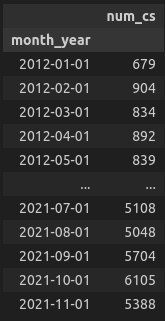

The dictionary `month_to_num` might be useful.

In [ ]:
# your code: Transform the CS arXiv submissions dataframe 
#
#
#


Your task is to compute a [moving / rolling average](https://en.wikipedia.org/wiki/Moving_average) of window size 5 (5 months) for the given CS arXiv submissions and to add the computed values as a separate column to the existing dataframe. This can be achieved by using 

 - [.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) and 
 - [.mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

Plot the original time series and the 5-months-moving average as a lineplot. The result should be similar to: 

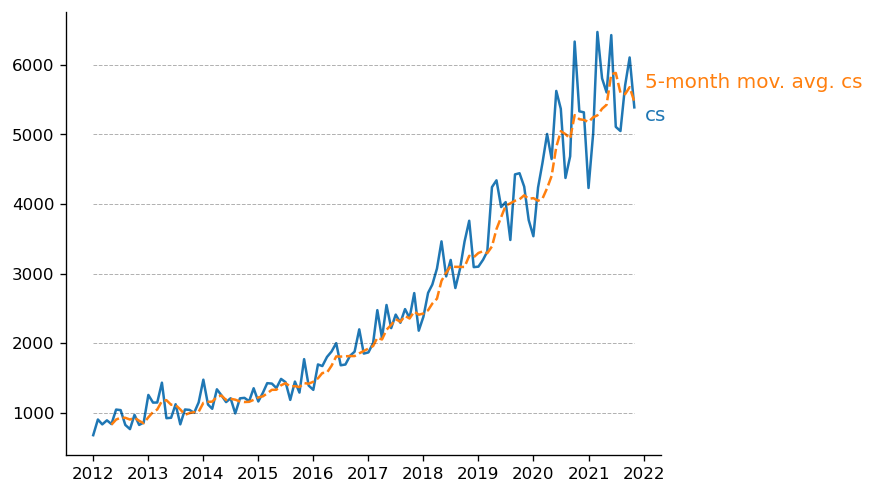




In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
# your code: compute moving average and plot the original time series and the moving average time series
#
#
#


## References 

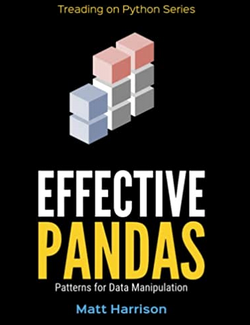